#Cargue cabeceros

In [ ]:
import pandas as pd
import numpy as np

#Ingrese y cargue las entradas

In [15]:
valores_x = "1,1.5,2,3" #@param {type:"string"}
valores_y = "2.7182818,4.4816891,7.389051,20.0855369" #@param {type:"string"}
variable_a_evaluar =  2.5#@param {type:"number"}

valores_x = list(valores_x.split(','))
valores_y = list(valores_y.split(','))

tabla = pd.DataFrame(
    {
        "x": valores_x,
        "y": valores_y
    }
)
tabla


,x,y
0,1,2.7182818
1,1.5,4.4816891
2,2,7.389051
3,3,20.0855369


#Carge matrix triangular método 1

In [16]:

matrix  = np.zeros(shape=(len(tabla),len(tabla)),dtype=float)
x = [float(i) for i in tabla['x']]
for i in range(0,len(tabla)):
  matrix[i][0] = float(tabla["y"][i])
print(tabla['x'])
print(matrix)
for i in range(1,len(tabla)):
  for j in range(i,len(tabla)):
    matrix[j][i] = (matrix[j][i-1]-matrix[j-1][i-1])/(x[j]-x[j-i]) 
print("resultados: ")
print(matrix)



0      1
1    1.5
2      2
3      3
Name: x, dtype: object
[[ 2.7182818  0.         0.         0.       ]
 [ 4.4816891  0.         0.         0.       ]
 [ 7.389051   0.         0.         0.       ]
 [20.0855369  0.         0.         0.       ]]
resultados: 
[[ 2.7182818  0.         0.         0.       ]
 [ 4.4816891  3.5268146  0.         0.       ]
 [ 7.389051   5.8147238  2.2879092  0.       ]
 [20.0855369 12.6964859  4.5878414  1.1499661]]


#Carge matrix por metodo del libro Richard L. Burden

In [ ]:
matrix  = np.zeros(shape=(len(tabla),len(tabla)),dtype=float)
x = [float(i) for i in tabla['x']]
for i in range(0,len(tabla)):
  matrix[i][0] = float(tabla["y"][i])
print(tabla['x'])
print(matrix)
for i in range(1,len(tabla)):
  for j in range(1,i+1):
    matrix[i][j] = (matrix[i][j-1]-matrix[i-1][j-1])/(x[i]-x[i-j]) 
print("resultados: ")
print(matrix)

0      1
1    1.5
2      2
3      3
Name: x, dtype: object
[[ 2.7182818  0.         0.         0.       ]
 [ 4.4816891  0.         0.         0.       ]
 [ 7.389051   0.         0.         0.       ]
 [20.0855369  0.         0.         0.       ]]
resultados: 
[[ 2.7182818  0.         0.         0.       ]
 [ 4.4816891  3.5268146  0.         0.       ]
 [ 7.389051   5.8147238  2.2879092  0.       ]
 [20.0855369 12.6964859  4.5878414  1.1499661]]


#Resultado:

In [17]:
#hayando el  polinomio
eval = float(variable_a_evaluar)
multiplicador = 1
p = matrix[0][0]
for i in range(1,len(tabla)):
  multiplicador = matrix[i][i]
  for j in range(1,i+1):
    multiplicador *= (eval-x[j-1])
  p += multiplicador
print("EL resultado en el punto ingresado es",p)



EL resultado en el punto ingresado es 12.302842075000001


#Polinomio en Latex

In [ ]:
vec = list(tabla['x'])
import sympy as sym
from sympy import init_session
import copy
init_session(use_latex=True)
x = sym.Symbol('x')
n = len(tabla)
multiplicador = 1
p = float(matrix[0][0])

for i in range(1,len(tabla)):
  multiplicador = float(matrix[i][i])
  for j in range(1,i+1):
    multiplicador = multiplicador * ( x - float(vec[j-1]))
  p = p +  multiplicador
print("El polinomio es")
p






IPython console for SymPy 1.7.1 (Python 3.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/

El polinomio es


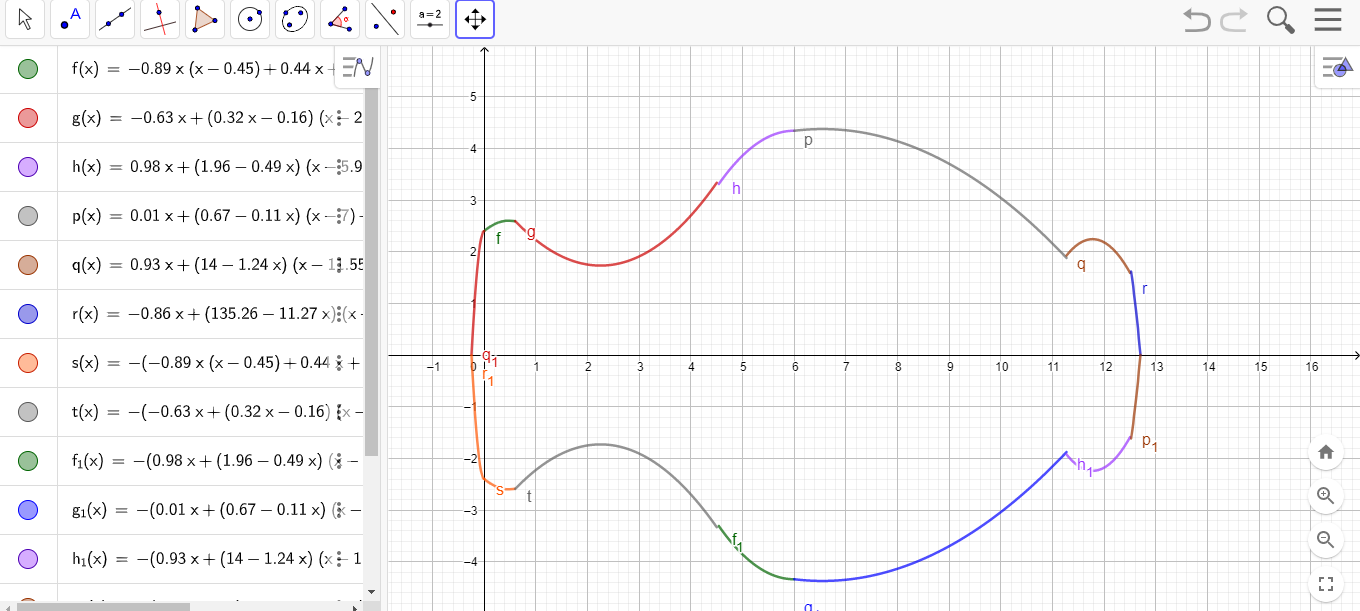
